In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#About Dataset
#Validation index for the competition https://www.kaggle.com/competitions/uspto-explainable-ai.
#The index provided by the competition host does not contain enough neighbors for an given patent number to accurately validate solutions.
#This dataset provides an index built from the neighbors of ~4000 publication numbers.
#The patent numbers can be found in validation_publication_numbers.csv.
#For convenience I also included a small subset of nearest_neighbors.csv
#containing only rows for the validation patents.
#This can be found in the file neighbors_small.csv


# Load the dataset
neighbors_data = pd.read_csv('/content/neighbors_small.csv')

In [ ]:
neighbors_data.head()

,publication_number,neighbor_0,neighbor_1,neighbor_2,neighbor_3,neighbor_4,neighbor_5,neighbor_6,neighbor_7,neighbor_8,...,neighbor_40,neighbor_41,neighbor_42,neighbor_43,neighbor_44,neighbor_45,neighbor_46,neighbor_47,neighbor_48,neighbor_49
0,US-10004275-B2,US-10238147-B2,US-9814272-B2,US-2016135504-A1,US-9999253-B2,US-10661032-B2,US-10582727-B2,US-10004274-B2,US-2021235765-A1,US-9993028-B2,...,US-11077262-B2,US-11147314-B2,US-9894935-B2,US-11103008-B2,US-10172393-B2,US-9814269-B2,US-2592808-A,US-2017224017-A1,US-9078475-B2,US-2015118071-A1
1,US-10004377-B2,US-9326658-B2,US-2016302642-A1,US-8967165-B2,US-9339166-B2,US-2011232690-A1,US-9693670-B2,US-7942156-B2,US-2017354307-A1,US-2006237050-A1,...,US-2013104935-A1,US-9492052-B2,US-4346723-A,US-11160433-B2,US-3502090-A,US-2015129512-A1,US-9839339-B2,US-10653291-B2,US-8834647-B2,US-9649006-B2
2,US-10006748-B2,US-11192659-B2,US-9976636-B2,US-10337500-B2,US-8581119-B2,US-2015093927-A1,US-9254794-B2,US-2022357136-A1,US-2879088-A,US-8893593-B2,...,US-10138927-B2,US-10218122-B1,US-7896570-B2,US-2017198744-A1,US-4393729-A,US-10465666-B2,US-8250980-B1,US-2015336675-A1,US-9593708-B2,US-2022136557-A1
3,US-10008131-B2,US-2013250245-A1,US-11382502-B2,US-7708402-B2,US-5652640-A,US-8511821-B2,US-2022313490-A1,US-9211061-B2,US-8414123-B2,US-2022215584-A1,...,US-2022387219-A1,US-9665771-B2,US-11672419-B2,US-10736605-B2,US-2021401401-A1,US-10863899-B2,US-2021212601-A1,US-2022125302-A1,US-7275827-B2,US-6634751-B2
4,US-10009256-B2,US-10938707-B2,US-9628435-B2,US-2017093685-A1,US-8498224-B2,US-10609621-B2,US-11539613-B2,US-10887224-B2,US-11622312-B2,US-9258208-B2,...,US-2022045944-A1,US-2012257624-A1,US-7983239-B1,US-8908670-B2,US-10541905-B2,US-10425485-B2,US-10129202-B2,US-2004213167-A1,US-7209978-B2,US-9887936-B2


In [ ]:
neighbors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   publication_number  3998 non-null   object
 1   neighbor_0          3998 non-null   object
 2   neighbor_1          3998 non-null   object
 3   neighbor_2          3998 non-null   object
 4   neighbor_3          3998 non-null   object
 5   neighbor_4          3998 non-null   object
 6   neighbor_5          3998 non-null   object
 7   neighbor_6          3998 non-null   object
 8   neighbor_7          3998 non-null   object
 9   neighbor_8          3998 non-null   object
 10  neighbor_9          3998 non-null   object
 11  neighbor_10         3998 non-null   object
 12  neighbor_11         3998 non-null   object
 13  neighbor_12         3998 non-null   object
 14  neighbor_13         3998 non-null   object
 15  neighbor_14         3998 non-null   object
 16  neighbor_15         3998

In [ ]:
# Check for duplicates and drop them
neighbors_data = neighbors_data.drop_duplicates()
print(f"Number of duplicates dropped: {neighbors_data.duplicated().sum()}")

Number of duplicates dropped: 0


In [ ]:
# Check for null values
print(f"Null values in dataset:\n{neighbors_data.isnull().sum()}")

Null values in dataset:
publication_number    0
neighbor_0            0
neighbor_1            0
neighbor_2            0
neighbor_3            0
neighbor_4            0
neighbor_5            0
neighbor_6            0
neighbor_7            0
neighbor_8            0
neighbor_9            0
neighbor_10           0
neighbor_11           0
neighbor_12           0
neighbor_13           0
neighbor_14           0
neighbor_15           0
neighbor_16           0
neighbor_17           0
neighbor_18           0
neighbor_19           0
neighbor_20           0
neighbor_21           0
neighbor_22           0
neighbor_23           0
neighbor_24           0
neighbor_25           0
neighbor_26           0
neighbor_27           0
neighbor_28           0
neighbor_29           0
neighbor_30           0
neighbor_31           0
neighbor_32           0
neighbor_33           0
neighbor_34           0
neighbor_35           0
neighbor_36           0
neighbor_37           0
neighbor_38           0
neighbor_39     

In [ ]:
# Ensure all publication numbers are treated as categorical
for col in neighbors_data.columns:
    neighbors_data[col] = neighbors_data[col].astype('category')

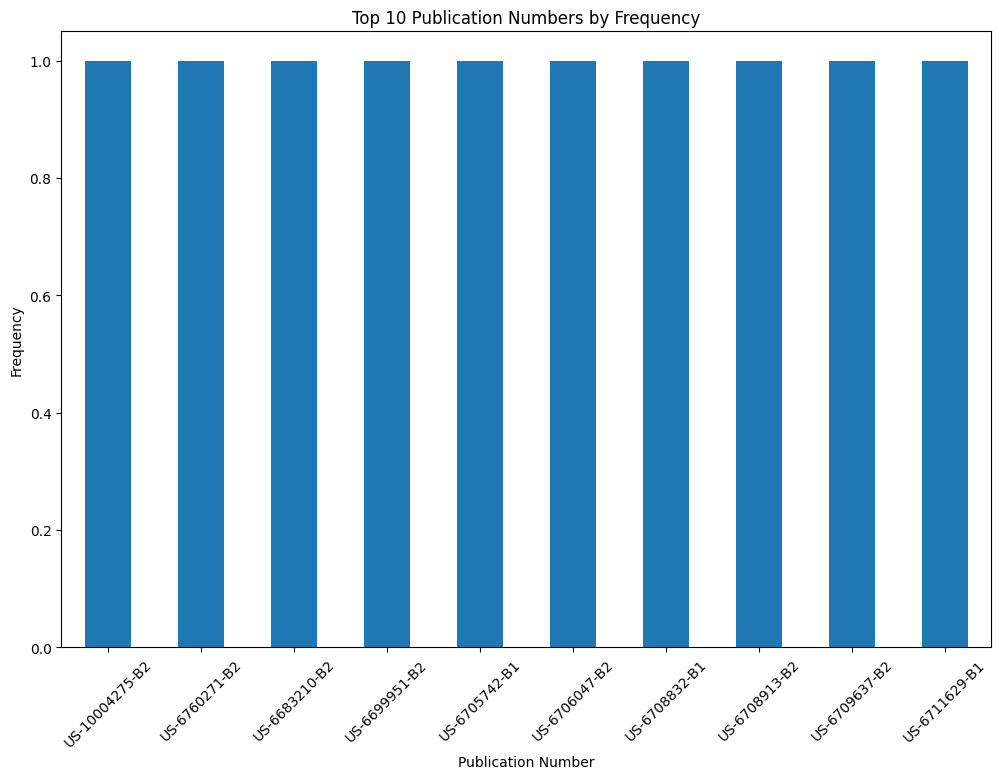

In [ ]:
# Visualize the frequency of top publication numbers
publication_counts = neighbors_data['publication_number'].value_counts()

# Select the top 10 publication numbers by frequency
top_10_publications = publication_counts.head(10)

plt.figure(figsize=(12, 8))
top_10_publications.plot(kind='bar')
plt.title('Top 10 Publication Numbers by Frequency')
plt.xlabel('Publication Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

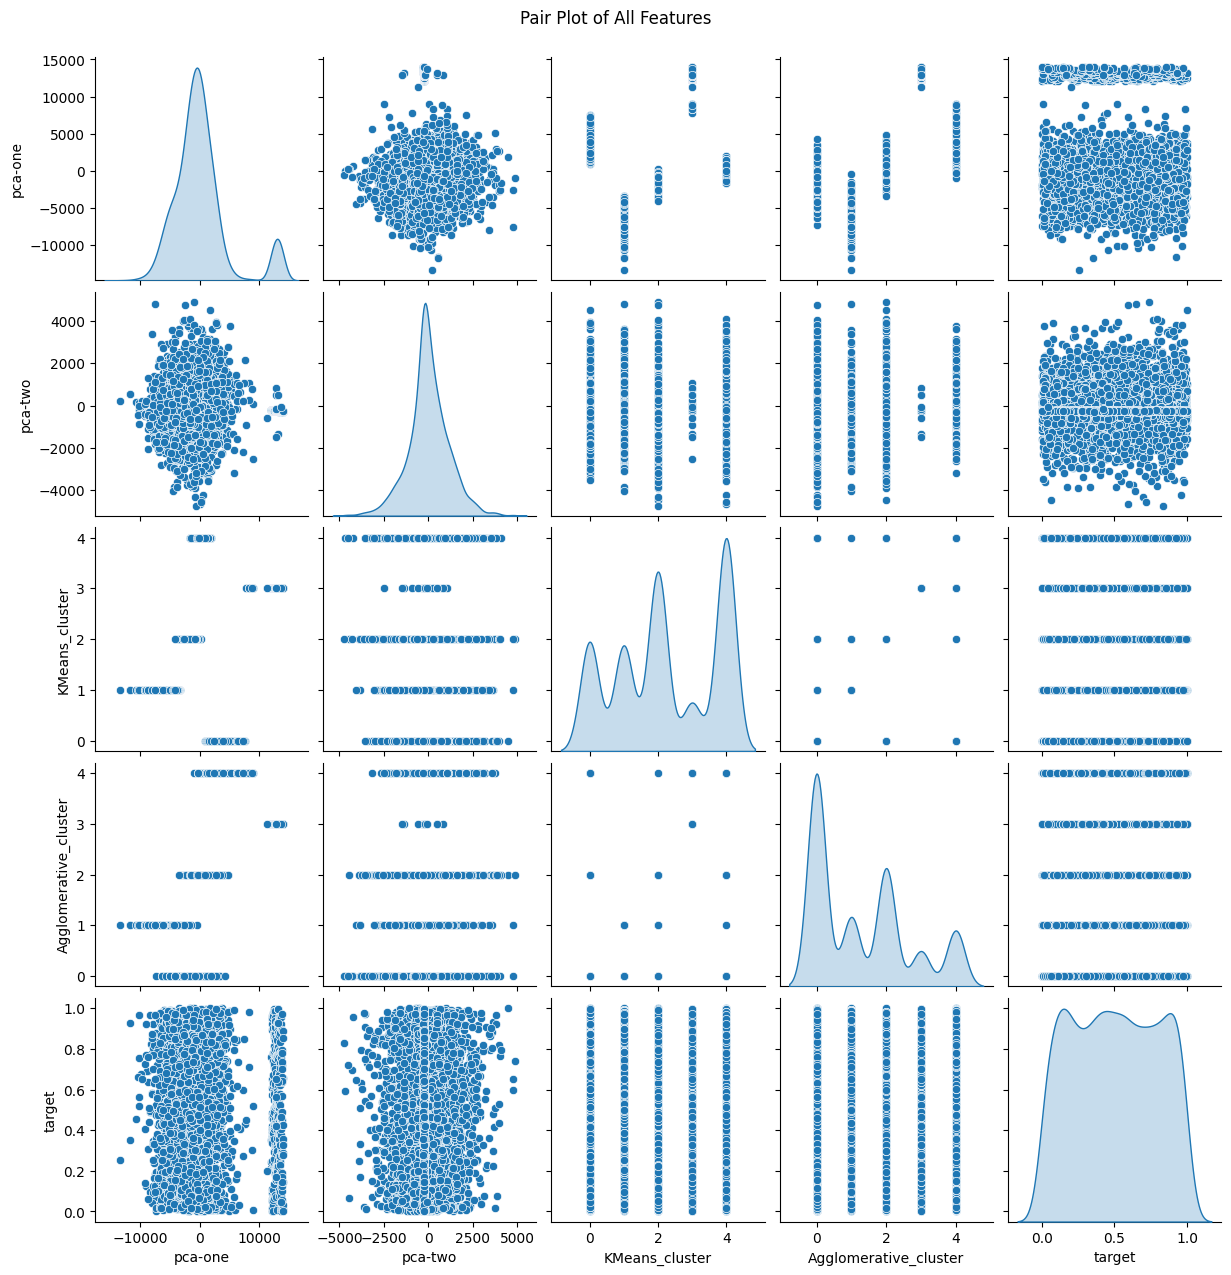

In [51]:
sns.pairplot(neighbors_data, diag_kind='kde')
plt.suptitle('Pair Plot of All Features', y=1.02)
plt.show()

In [ ]:
# Encode categorical data to numeric
le = LabelEncoder()
encoded_data = neighbors_data.apply(le.fit_transform)

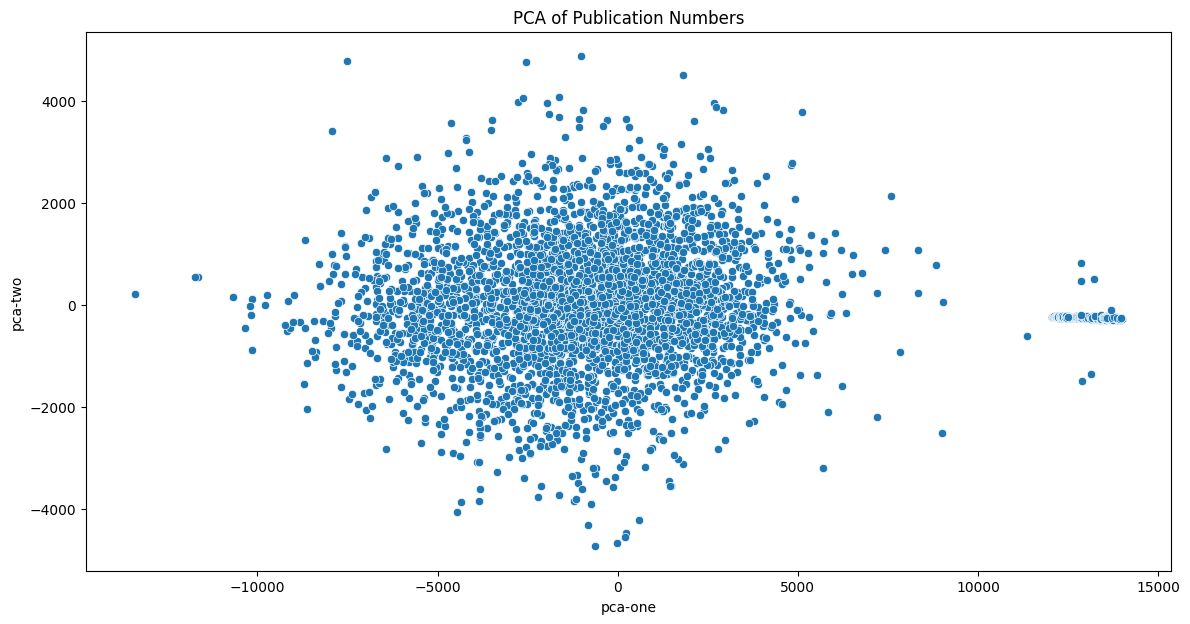

In [ ]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_data)
neighbors_data['pca-one'] = pca_result[:,0]
neighbors_data['pca-two'] = pca_result[:,1]

plt.figure(figsize=(14, 7))
sns.scatterplot(x="pca-one", y="pca-two", data=neighbors_data)
plt.title('PCA of Publication Numbers')
plt.show()

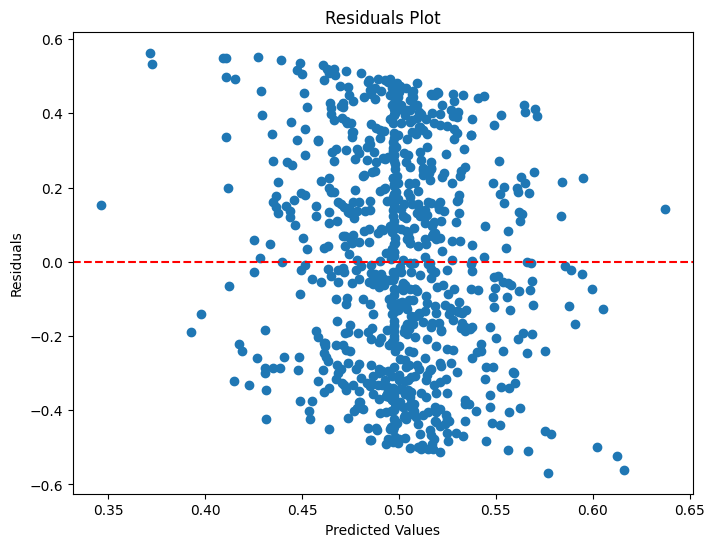

In [68]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
# Function to apply clustering and evaluate
def apply_clustering_and_evaluate(model, data, model_name):
    model.fit(data)
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(data)

    silhouette_avg = silhouette_score(data, labels)
    neighbors_data[model_name + '_cluster'] = labels
    print(f'Silhouette Score for {model_name}: {silhouette_avg}')

    plt.figure(figsize=(14, 7))
    sns.scatterplot(x="pca-one", y="pca-two", hue=model_name + '_cluster', data=neighbors_data, palette=sns.color_palette("hsv", len(set(labels))))
    plt.title(f'PCA of Publication Numbers with {model_name} Clustering')
    plt.show()

    return silhouette_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for KMeans: 0.08919857464624492


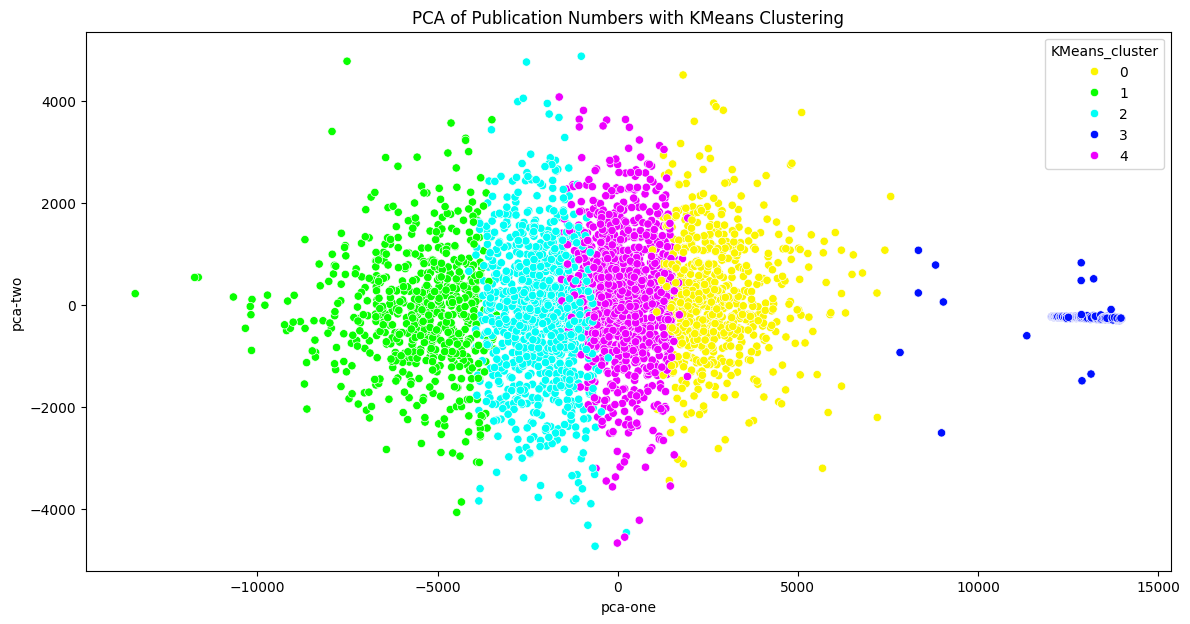

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=11)
kmeans_score = apply_clustering_and_evaluate(kmeans, encoded_data, 'KMeans')

Silhouette Score for Agglomerative: 0.07777075794491062


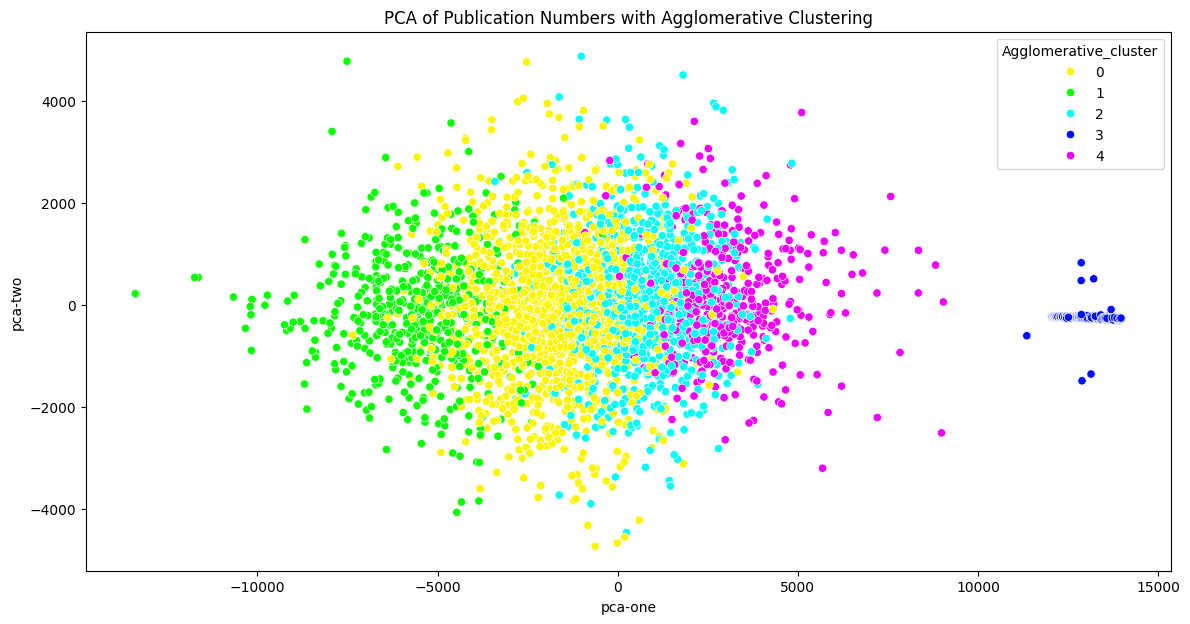

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Apply Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=5)
agglom_score = apply_clustering_and_evaluate(agglom, encoded_data, 'Agglomerative')

In [ ]:
# Regression Model
# Assuming we have a target variable named 'target' in the dataset
# For demonstration, let's create a dummy target variable
neighbors_data['target'] = np.random.rand(neighbors_data.shape[0])

# Split the data into train and test sets
X = encoded_data
y = neighbors_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R2 Score: {r2}")

Linear Regression MSE: 0.08675218907774851
Linear Regression R2 Score: -0.02391627872901836


In [ ]:
# Compare Scores
print(f"KMeans Silhouette Score: {kmeans_score}")
print(f"agglom Silhouette Score: {agglom_score}")
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R2 Score: {r2}")

# Since silhouette score and regression metrics are not directly comparable,
# we'll highlight the best clustering algorithm separately.
best_clustering_model = max([('KMeans', kmeans_score), ('DBSCAN', agglom_score)], key=lambda x: x[1])
print(f"The best clustering model is {best_clustering_model[0]} with a Silhouette Score of {best_clustering_model[1]}")

KMeans Silhouette Score: 0.08919857464624492
agglom Silhouette Score: 0.07777075794491062
Linear Regression MSE: 0.08675218907774851
Linear Regression R2 Score: -0.02391627872901836
The best clustering model is KMeans with a Silhouette Score of 0.08919857464624492
